In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rand
from EDMtoolkit import *
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [6]:
filename = "..\Datasets\paramecium_didinium - Cleaned.csv"

df = pd.read_csv(filename, encoding="utf-8", na_filter=False)
table = df.to_numpy()

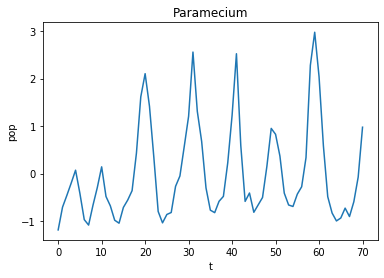

In [3]:
paramecium = standardize(table[:,0])
plotTS(paramecium, title="Paramecium")

In [12]:
paramecium.shape

(71,)

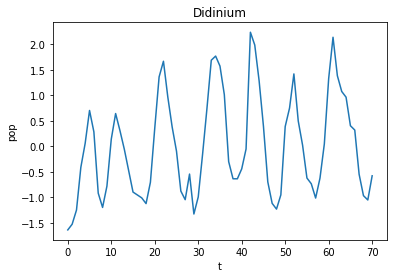

In [13]:
didinium = standardize(table[:,1])
plotTS(didinium, title="Didinium")

In [5]:
find_tau_autocorr(paramecium)

1.0
0.7518911922488366
0.300723331482504
-0.12738719094572767


3

In [6]:
find_tau_autocorr(didinium)

1.0
0.7699033860714691
0.321358576048928
-0.17039140545359324


3

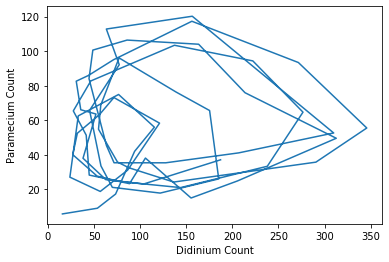

In [7]:
fig, ax = plt.subplots(1,figsize=(6,4))
ax.plot(table[:,0],table[:,1])
ax.set_ylabel("Paramecium Count")
ax.set_xlabel("Didinium Count")
plt.show()

In [8]:
t = np.linspace(0,1,num=len(table[:,0]))
# t = np.linspace(0,1,num=len(pico_stationary_period))

In [27]:
delta_agg_p, theta_agg_p, r_sqrd_p = get_delta_agg(paramecium, 3, t=t, tau=1, horizon=1, return_forecast_skill=True)

In [28]:
delta_agg_d, theta_agg_d, r_sqrd_d = get_delta_agg(table[:,1], 4, t=t, tau=1, horizon=1, return_forecast_skill=True)

In [29]:
print("Paramecium")
print(f"delta_agg = {delta_agg_p:0.3f}, r_sqrd = {r_sqrd_p:0.3f}")

print("Didinium")
print(f"delta_agg = {delta_agg_d:0.3f}, r_sqrd = {r_sqrd_d:0.3f}")

Paramecium
delta_agg = 0.009, r_sqrd = 0.771
Didinium
delta_agg = 0.066, r_sqrd = 0.738


In [32]:
1/np.sqrt(0.1)

3.162277660168379

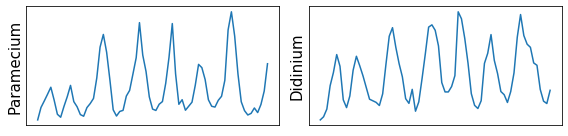

In [19]:
fig, ax = plt.subplots(1,2,figsize=(8,2), tight_layout=True)

ax[0].plot(np.linspace(0,1,num=len(paramecium)), paramecium)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_ylabel(r"Paramecium", rotation=90, fontsize=15)

ax[1].plot(np.linspace(0,1,num=len(didinium)), didinium)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_ylabel(r"Didinium", rotation=90, fontsize=15)
    
# plt.savefig("../Figures/simulation_series_supplement/round1_series.png", dpi=300)
plt.savefig("../PDF_figures_tables/paramecium_didinium/pd_series.pdf", format="pdf", bbox_inches="tight")
# plt.show()